In [1]:
btn_file = "./data_three_people/btndata.txt"
sensor_file = "./data_three_people/test.txt"
cat = 15
btn_raw = []
sensor_raw = []
with open(btn_file) as f:
    btn_raw = f.readlines()
    for i in range(len(btn_raw)):
        btn_raw[i] = btn_raw[i].strip("\n").split("||")
    print(btn_raw[0])
    print(btn_raw[1])
    f.close()
    
with open(sensor_file) as f:
    sensor_raw = f.readlines()
    for i in range(len(sensor_raw)):
        sensor_raw[i] = sensor_raw[i].strip("\n").split("||")
    print(sensor_raw[0])
    print(sensor_raw[3])
    f.close()

['ButttonData', '3', 'ACTION_DOWN', '1530620254016', '162656629']
['ButttonData', '3', 'ACTION_UP', '1530620256112', '162658727']
['accelerometer', '1.1188049', '4.355835', '9.313141', '1530620252677', '468703532067256']
['gyroscope', '0.075149536', '0.36915588', '-0.046432495', '1530620252680', '468703539971308']


In [21]:
data_am = [[] for i in range(cat)]
data_gy = [[] for i in range(cat)]
for i in range(len(btn_raw)//2):
    botton = int(btn_raw[2*i][1])
    down = int(btn_raw[2*i][3])
    up = int(btn_raw[2*i+1][3])
    accelerometer = []
    gyroscope = []
    token = False
    for j in range(len(sensor_raw)):
        time = int(sensor_raw[j][4])
        if(time>down and time<up):
            token = True
            if(sensor_raw[j][0] == 'accelerometer'):
                accelerometer.append(sensor_raw[j][1:4])
            elif(sensor_raw[j][0] == 'gyroscope'):
                gyroscope.append(sensor_raw[j][1:4])
        if(token and time>up):
            break
        if(len(gyroscope)==1000):
            print(i,j)
            break
    if(len(gyroscope)>50):        
        data_am[botton].append(accelerometer)
        data_gy[botton].append(gyroscope)

768 901128


In [3]:
#for i in range(len(data_am)):
#    for j in range(len(data_am[i])):
#        print(len(data_am[i][j]))

In [22]:
arg_am = []
for i in range(len(data_am)):
    arg_am.append([])
    for j in range(len(data_am[i])):
        arg_am[i].append([])
        arg_am[i][j] = data_am[i][j]
        while(len(arg_am[i][j])<1000):
            arg_am[i][j].append(arg_am[i][j][-1])
        assert len(arg_am[i][j])==1000

In [ ]:
#arg_am

In [ ]:
#for i in range(len(arg_am)):
#    for j in range(len(arg_am[i])):
#        print(len(arg_am[i][j]))

In [ ]:
#for i in range(len(data_gy)):
#    for j in range(len(data_gy[i])):
#        print(len(data_gy[i][j]))

In [23]:
arg_gy = []
for i in range(len(data_gy)):
    arg_gy.append([])
    for j in range(len(data_gy[i])):
        arg_gy[i].append([])
        arg_gy[i][j] = data_gy[i][j]
        while(len(arg_gy[i][j])<1000):
            arg_gy[i][j].append(arg_gy[i][j][-1])

In [ ]:
#for i in range(len(arg_gy)):
#    for j in range(len(arg_gy[i])):
#        print(len(arg_gy[i][j]))

In [24]:
data = []
for i in range(len(data_gy)):
    data.append([])
    for j in range(len(data_gy[i])):
        data[i].append([])
        data[i][j] = data_am[i][j]
        data[i][j].extend(data_gy[i][j])

In [ ]:
#for i in range(len(data)):
#    for j in range(len(data[i])):
#        print(len(data[i][j]))

In [25]:
data_x = []
data_y = []
for i in range(len(data)):
    for j in range(len(data[i])):
        data_y.append(i)
        data_x.append(data[i][j])

In [27]:
import numpy as np

In [28]:
data_x = np.array(data_x).astype(np.float64)
data_y = np.array(data_y).astype(np.float64)

In [29]:
data_x = np.reshape(data_x,(-1,6000))
data_y = np.reshape(data_y,(-1,1))

In [30]:
print(data_x.shape)
print(data_y.shape)

(857, 6000)
(857, 1)


In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
x_train, x_dev, y_train, y_dev = train_test_split(data_x, data_y, test_size=0.2,random_state=0)

In [33]:
y_train = to_categorical(y_train)
y_dev = to_categorical(y_dev)

Text(0.5,1,'data')

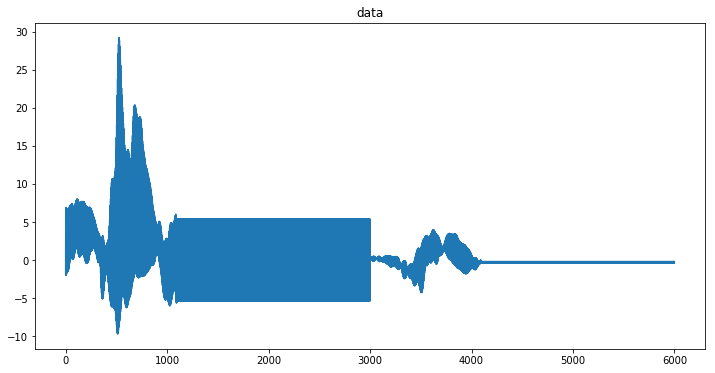

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.plot(x_train[0])
ax.set_title('data')

In [40]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(8192, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(cat, activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=1e-4), metrics=["accuracy"])

In [42]:
hist = model.fit(x_train, y_train,
                           #steps_per_epoch=9000,
                           epochs=200, #Increase this when not on Kaggle kernel
                           validation_data=(x_dev, y_dev))
                           #validation_steps = 1,
                           #callbacks=[annealer])

Train on 685 samples, validate on 172 samples
Epoch 1/200
685/685 [==============================] - 2s 4ms/step - loss: 2.5741 - acc: 0.2569 - val_loss: 1.0396 - val_acc: 0.7616
Epoch 2/200
685/685 [==============================] - 1s 1ms/step - loss: 1.6509 - acc: 0.4905 - val_loss: 0.7726 - val_acc: 0.8198
Epoch 3/200
685/685 [==============================] - 1s 1ms/step - loss: 1.3124 - acc: 0.6219 - val_loss: 0.6206 - val_acc: 0.8605
Epoch 4/200
685/685 [==============================] - 1s 1ms/step - loss: 1.1503 - acc: 0.6715 - val_loss: 0.5480 - val_acc: 0.8837
Epoch 5/200
685/685 [==============================] - 1s 1ms/step - loss: 1.1657 - acc: 0.6730 - val_loss: 0.5258 - val_acc: 0.8663
Epoch 6/200
685/685 [==============================] - 1s 1ms/step - loss: 1.0720 - acc: 0.7182 - val_loss: 0.4851 - val_acc: 0.8779
Epoch 7/200
685/685 [==============================] - 1s 1ms/step - loss: 1.0054 - acc: 0.7358 - val_loss: 0.4289 - val_acc: 0.9070
Epoch 8/200
685/685 [==

Epoch 62/200
685/685 [==============================] - 1s 1ms/step - loss: 0.2663 - acc: 0.9723 - val_loss: 0.1702 - val_acc: 0.9826
Epoch 63/200
685/685 [==============================] - 1s 1ms/step - loss: 0.2633 - acc: 0.9562 - val_loss: 0.1682 - val_acc: 0.9651
Epoch 64/200
685/685 [==============================] - 1s 1ms/step - loss: 0.2934 - acc: 0.9533 - val_loss: 0.1656 - val_acc: 0.9651
Epoch 65/200
685/685 [==============================] - 1s 1ms/step - loss: 0.2837 - acc: 0.9533 - val_loss: 0.1584 - val_acc: 0.9767
Epoch 66/200
685/685 [==============================] - 1s 1ms/step - loss: 0.2677 - acc: 0.9591 - val_loss: 0.1546 - val_acc: 0.9767
Epoch 67/200
685/685 [==============================] - 1s 1ms/step - loss: 0.2649 - acc: 0.9606 - val_loss: 0.1536 - val_acc: 0.9767
Epoch 68/200
685/685 [==============================] - 1s 1ms/step - loss: 0.2557 - acc: 0.9679 - val_loss: 0.1546 - val_acc: 0.9709
Epoch 69/200
685/685 [==============================] - 1s 1ms

Epoch 123/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1450 - acc: 0.9839 - val_loss: 0.1378 - val_acc: 0.9767
Epoch 124/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1313 - acc: 0.9854 - val_loss: 0.1268 - val_acc: 0.9826
Epoch 125/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1523 - acc: 0.9752 - val_loss: 0.1312 - val_acc: 0.9826
Epoch 126/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1748 - acc: 0.9635 - val_loss: 0.1389 - val_acc: 0.9709
Epoch 127/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1288 - acc: 0.9854 - val_loss: 0.1336 - val_acc: 0.9767
Epoch 128/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1674 - acc: 0.9693 - val_loss: 0.1496 - val_acc: 0.9709
Epoch 129/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1412 - acc: 0.9752 - val_loss: 0.1344 - val_acc: 0.9826
Epoch 130/200
685/685 [==============================] 

685/685 [==============================] - 1s 1ms/step - loss: 0.0978 - acc: 0.9854 - val_loss: 0.1326 - val_acc: 0.9826
Epoch 184/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1051 - acc: 0.9854 - val_loss: 0.1336 - val_acc: 0.9826
Epoch 185/200
685/685 [==============================] - 1s 1ms/step - loss: 0.1105 - acc: 0.9825 - val_loss: 0.1448 - val_acc: 0.9767
Epoch 186/200
685/685 [==============================] - 1s 1ms/step - loss: 0.0787 - acc: 0.9956 - val_loss: 0.1350 - val_acc: 0.9826
Epoch 187/200
685/685 [==============================] - 1s 1ms/step - loss: 0.0807 - acc: 0.9942 - val_loss: 0.1872 - val_acc: 0.9709
Epoch 188/200
685/685 [==============================] - 1s 1ms/step - loss: 0.0962 - acc: 0.9839 - val_loss: 0.1405 - val_acc: 0.9826
Epoch 189/200
685/685 [==============================] - 1s 1ms/step - loss: 0.0871 - acc: 0.9927 - val_loss: 0.1498 - val_acc: 0.9767
Epoch 190/200
685/685 [==============================] - 1s 1ms/step 

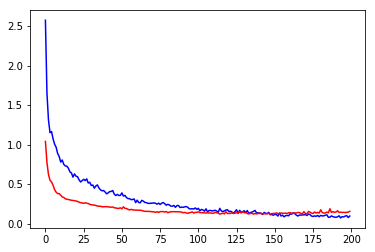

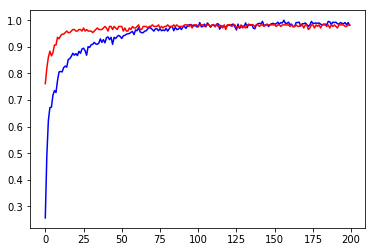

In [43]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [44]:
y_hat = model.predict(x_dev)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_dev, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


In [46]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes = True)